In [1]:
import plotly.graph_objs as go
import plotly
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read Data from csv file

In [2]:
multivariable_data = pd.read_csv('MultipleLR.csv', names=['X1', 'X2', 'X3', 'Y'])
multivariable_data

,X1,X2,X3,Y
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


### Shuffle the data

In [3]:
multivariable_data = shuffle(multivariable_data)
multivariable_data

,X1,X2,X3,Y
0,73,80,75,152
4,73,66,70,142
19,78,83,77,159
1,93,88,93,185
7,47,56,60,115
6,69,74,77,149
14,70,73,78,148
5,53,46,55,101
2,89,91,90,180
11,70,65,74,141


### Add theta0 column (bias)

In [4]:
multivariable_data.insert(0, 'Ones', 1)
X_multi = multivariable_data.iloc[:, :-1]
X_multi

,Ones,X1,X2,X3
0,1,73,80,75
4,1,73,66,70
19,1,78,83,77
1,1,93,88,93
7,1,47,56,60
6,1,69,74,77
14,1,70,73,78
5,1,53,46,55
2,1,89,91,90
11,1,70,65,74


In [5]:
Y_multi = multivariable_data.iloc[:,-1]
Y_multi.shape

(25,)

# Adam (Batch Version)

In [6]:
def multivariate_Adam_gradient_descent(X,y,alpha,epsilon,beta1,beta2,epochs):
    thetas = np.zeros(X.shape[1])
    vs = np.zeros(X.shape[1])
    ms = np.zeros(X.shape[1])
    n = len(X)
    costs = []
    thetas_list = []
    hypothesis =[]
    gradient_list = []
    for i in range(epochs):
        y_hat = X @ thetas
        hypothesis.append(y_hat)
        z = y_hat - y
        costs.append((1/(2*n)) * np.sum(np.power(z,2)))
        
        gradient = (X.T@z/n)  
        gradient_list.append(gradient)
        
        ms = (beta1 * ms) + (1 - beta1) * gradient
        vs = (beta2 * vs) + (1 - beta2) * np.power(gradient,2)
        ms_hat = ms / (1 - (np.power(beta1, i+1)))
        vs_hat = vs / (1 - (np.power(beta2, i+1)))
        
        thetas = thetas - ((alpha / (np.sqrt(vs_hat) + epsilon)) * ms_hat)
        thetas_list.append(thetas)
        
        if i > 0:
            if abs(costs[i-1] - costs[i]) < 0.001:
                break
            if abs(np.linalg.norm(gradient_list[i-1]) - np.linalg.norm(gradient_list[i])) < 0.001:
                break

    print(f"After {i} iterations")
    return thetas, costs, hypothesis, thetas_list

### Values of Thetas

In [7]:
thetas_batch, costs_batch, hypothesis_batch, thetas_list_batch = multivariate_Adam_gradient_descent(X_multi,Y_multi,0.003,1e-08,0.9,0.9,1000)
print("Thetas are: ")
for i in range(len(thetas_batch)):
    print("Theta " + str(i) +" : " + str(thetas_batch[i]))

After 302 iterations
Thetas are: 
Theta 0 : 0.6664360750558337
Theta 1 : 0.6628737329612766
Theta 2 : 0.6617197532413692
Theta 3 : 0.6897864397610819


### R2 Score

In [8]:
prediction = X_multi @ thetas_batch

print("R2 Score:", r2_score(Y_multi, prediction))

R2 Score: 0.9789820900939714


### Loss vs Iterations Plot

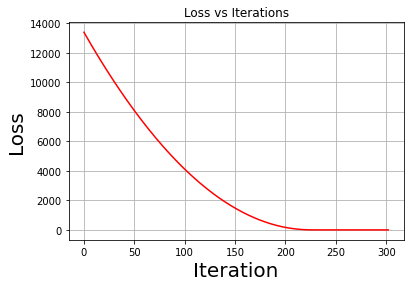

In [9]:
plt.title("Loss vs Iterations")
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.plot(costs_batch, 'r')
plt.grid()
plt.show()

### Loss vs parameters 

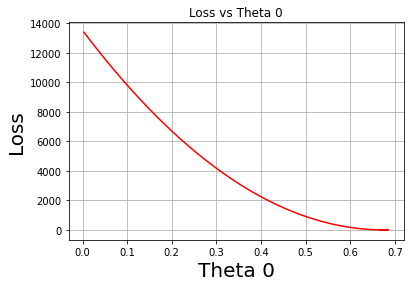

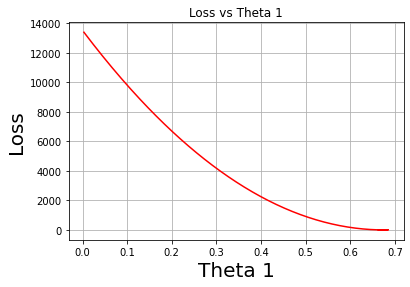

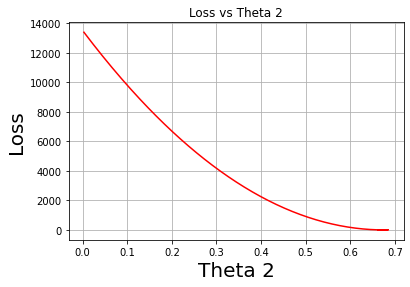

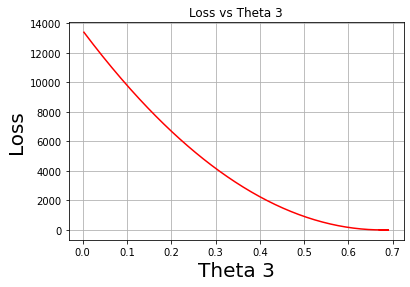

In [10]:
for i in range(4):
    theta_list = [x[i] for x in thetas_list_batch]
    plt.title("Loss vs Theta "+ str(i))
    plt.xlabel('Theta '+ str(i), fontsize=20)
    plt.ylabel('Loss', fontsize=20)
    plt.plot(theta_list, costs_batch, 'r')
    plt.grid()
    plt.show()

## Adam (Mini-batch Version)

### Function to divide data into mini-batches

In [11]:
def create_mini_batches(X, Y, batch_size):
    mini_batches = []
    data = np.column_stack((X, Y))
    num_mini_batches = data.shape[0] // batch_size

    for i in range(num_mini_batches):
        mini_batch = data[i * batch_size: (i + 1)*batch_size, :]
        X_mini = mini_batch[:, : -1]
        Y_mini = mini_batch[:, -1]
        mini_batches.append((X_mini, Y_mini))
    return mini_batches, num_mini_batches

### Algorithm Implementation

In [12]:
def mini_batch_multivariate_adam_gradient_descent(X, y, alpha, epsilon, beta1, beta2, epochs, batch_size):
    thetas = np.zeros(X.shape[1])
    vs = np.zeros(X.shape[1])
    ms = np.zeros(X.shape[1])
    costs = []
    mini_batch_costs = []
    thetas_list = []
    hypothesis = []
    hypothesis_total = []
    epoch_thetas = []
    gradients = []
    for i in range(epochs):
        mini_batches, num_mini_batches = create_mini_batches(X, y, batch_size)
        for mini_batch in mini_batches:
            thetas_list.append(thetas)
            X_mini, Y_mini = mini_batch
            y_minibatch_hat = X_mini @ thetas
            hypothesis.append(y_minibatch_hat)
            z = y_minibatch_hat - Y_mini
            mini_batch_costs.append(
                (1/(2*num_mini_batches)) * np.sum(np.power(z, 2)))
            D_thetas = (X_mini.T@z)/num_mini_batches

            
            
            ms = beta1 * ms + (1 - beta1) * D_thetas
            vs = beta2 * vs + (1 - beta2) * np.power(D_thetas, 2)
            ms_hat = ms / (1 - (np.power(beta1, i+1)))
            vs_hat = vs / (1 - (np.power(beta2, i+1)))

            thetas = thetas - ((alpha / (np.sqrt(vs_hat)+epsilon)) * ms_hat)

       
        epoch_thetas.append(thetas)
        gradients.append(D_thetas)
        y_hat_total = X @ thetas
        z_total = y_hat_total - y
        costs.append((1/(2*num_mini_batches) * np.sum(np.power(z_total, 2))))
#         D_thetas_epoch = (X.T@z_total)/len(X)
#         va = np.linalg.norm(D_thetas_epoch)
        if i > 0:
            if abs(costs[i-1] - costs[i]) < 0.001:
                break
#             if abs(np.linalg.norm(D_thetas_epoch)) < 0.001:
#                 break
            if abs(np.linalg.norm(gradients[i-1]) - np.linalg.norm(gradients[i])) < 0.001:
                break

        hypothesis_total.append(y_hat_total)

    print(f"After {i} iterations")
    return thetas_list, costs, hypothesis, thetas, mini_batches, mini_batch_costs, epoch_thetas, hypothesis_total

### Values of Thetas

In [13]:
thetas_list_mini_batch, costs_mini_batch, hypothesis_mini_batch, thetas_mini_batch, mini_batches, mini_batch_costs, epoch_thetas, hypothesis_total = mini_batch_multivariate_adam_gradient_descent(
    X_multi, Y_multi, 0.001, 1e-08, 0.9, 0.9, 1000, 4)
print("Thetas are: ")
for i in range(len(thetas_mini_batch)):
    print("Theta " + str(i) +" : " + str(thetas_mini_batch[i]))

After 144 iterations
Thetas are: 
Theta 0 : 0.676486332309634
Theta 1 : 0.6647089389808022
Theta 2 : 0.6624847088749862
Theta 3 : 0.6871859180800561


### R2 Score

In [14]:
prediction_mini_batch = X_multi @ thetas_mini_batch

print("R2 Score:", r2_score(Y_multi, prediction_mini_batch))

R2 Score: 0.9788674079610981


### Loss vs Iterations Plot

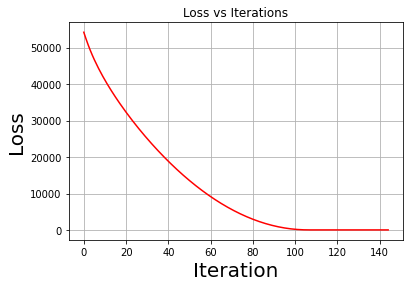

In [15]:
plt.title("Loss vs Iterations")
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.plot(costs_mini_batch, 'r')
plt.grid()
plt.show()

### Loss vs parameters 

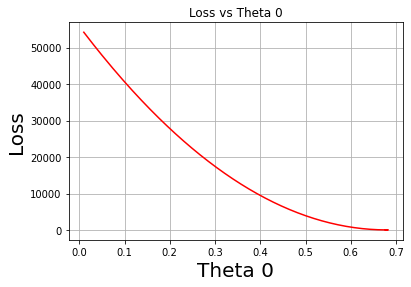

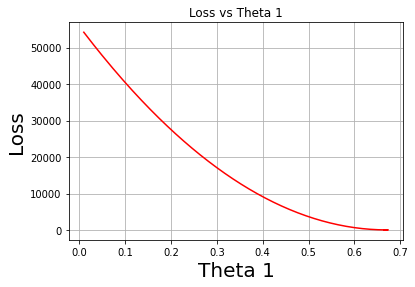

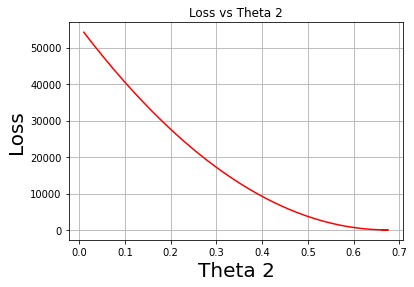

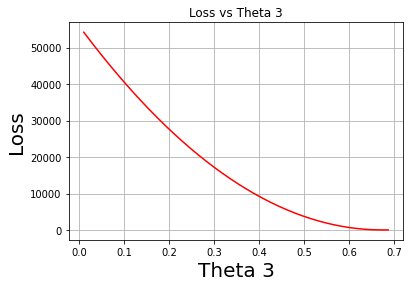

In [16]:
for i in range(4):
    theta_list = [x[i] for x in epoch_thetas]
    plt.title("Loss vs Theta "+ str(i))
    plt.xlabel('Theta '+ str(i), fontsize=20)
    plt.ylabel('Loss', fontsize=20)
    plt.plot(theta_list, costs_mini_batch, 'r')
    plt.grid()
    plt.show()